In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import folium


In [2]:
data = pd.read_csv("final_data.csv")
data.head()

,id,date,exp_date,house_direction,balcony_direction,bedroom,toilet,legit,furniture,floor,facade,entrance,city,district,ward,street,area,price
0,batdongsan_com_vn_35339744,25/11/2022,05/12/2022,Nam,Bắc,3,2,None,NaN,None,None,None,Hà Nội,Tây Hồ,Phường Phú Thượng,None,100.00,4000.000
1,batdongsan_com_vn_35747475,28/11/2022,08/12/2022,Nam,Bắc,2,2,Sổ đỏ/ Sổ hồng,NaN,None,None,None,Hà Nội,Tây Hồ,Phường Phú Thượng,Đường Võ Chí Công,80.74,3496.042
2,batdongsan_com_vn_35981012,29/11/2022,06/12/2022,None,None,3,3,Sổ đỏ/ Sổ hồng,Đầy đủ,None,None,None,Hà Nội,Cầu Giấy,Phường Yên Hòa,Đường Dương Đình Nghệ,131.00,5900.000
3,batdongsan_com_vn_35968324,28/11/2022,08/12/2022,None,None,5,None,Sổ đỏ/ Sổ hồng.,Cơ bản.,5,None,None,Hà Nội,Long Biên,Phường Bồ Đề,Đường Bồ Đề,52.00,6750.000
4,batdongsan_com_vn_35957404,26/11/2022,03/12/2022,None,None,3,2,Sổ đỏ/ Sổ hồng,"Nội thất đầy đủ: Thiết bị điện tử(tivi, tủ lạn...",None,None,None,Hà Nội,Nam Từ Liêm,Thị trấn Cầu Diễn,Đường Hàm Nghi,119.00,5800.000


In [5]:
data["date"] = pd.to_datetime(data["date"], infer_datetime_format=True)

In [8]:
data = data.sort_values("date", axis=0).reset_index()

In [9]:
import folium

world_map = folium.Map()

In [13]:
for i in data.columns:
    print(i)

index
id
date
exp_date
house_direction
balcony_direction
bedroom
toilet
legit
furniture
floor
facade
entrance
city
district
ward
street
area
price


In [18]:
pd.DataFrame(data["price"].describe())

,price
count,1.488900e+04
mean,2.945639e+04
std,1.885417e+06
min,1.600000e+00
25%,3.070000e+03
50%,5.200000e+03
75%,1.200000e+04
max,2.300000e+08


In [46]:
price = data["price"]
price = price[price <2.3e8]

<AxesSubplot:>

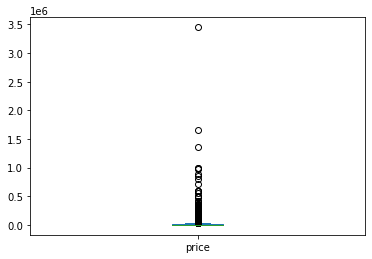

In [47]:
price.plot(kind="box")

In [48]:
IQR = data.price.quantile(0.75) - data.price.quantile(0.25)
Lower_fence = data.price.quantile(0.25) - (IQR * 3)
Upper_fence = data.price.quantile(0.75) + (IQR * 3)

In [49]:
price = price[(price >= Lower_fence) & (price <= Upper_fence)]
price

0         1850.0
1         9400.0
2        32000.0
3         2050.0
4        36000.0
          ...   
14884     7200.0
14885     2700.0
14886     4300.0
14887     4650.0
14888     4300.0
Name: price, Length: 13860, dtype: float64

<AxesSubplot:>

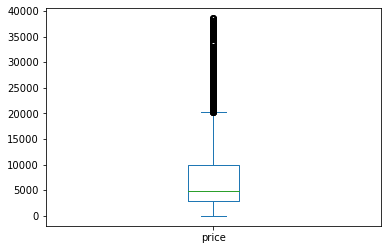

In [50]:
price.plot(kind="box")

{'bodies': [<matplotlib.collections.PolyCollection at 0x2b4da9e81f0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2b4da9e8160>,
 'cmins': <matplotlib.collections.LineCollection at 0x2b4da9e88b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2b4da9e8c70>}

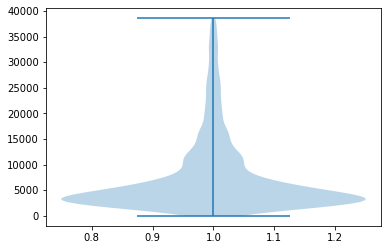

In [51]:
plt.violinplot(price)

<AxesSubplot:title={'center':'Price (million vnd)'}, ylabel='Frequency'>

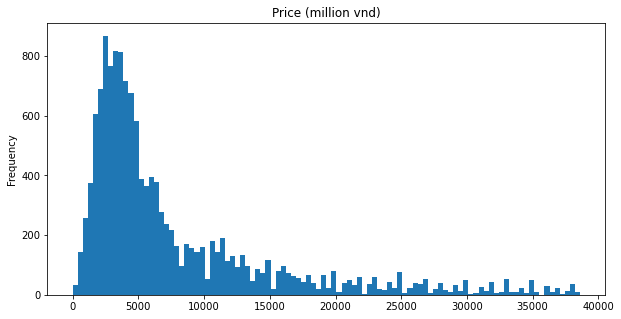

In [78]:
price.plot(kind="hist", bins=100, figsize=(10,5), title="Price (million vnd)")

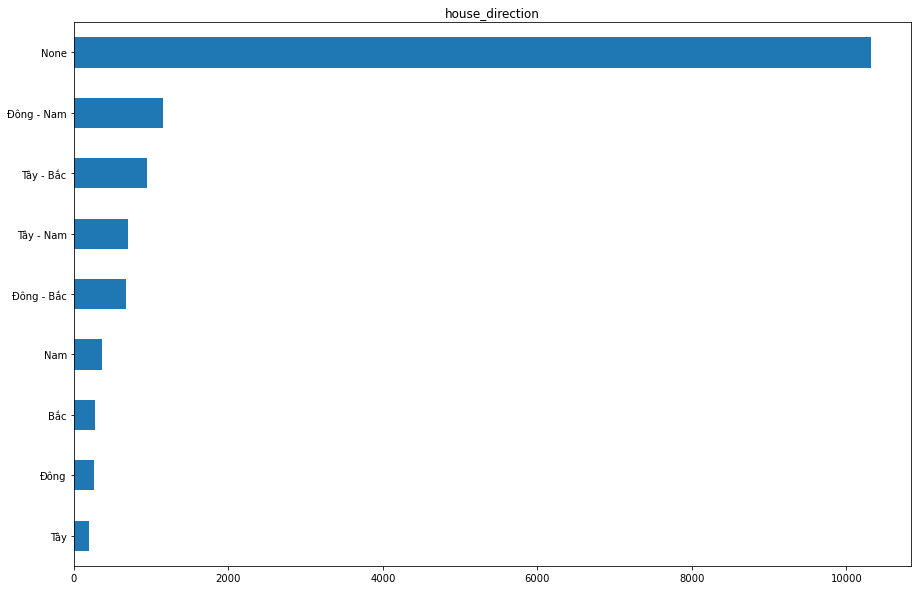

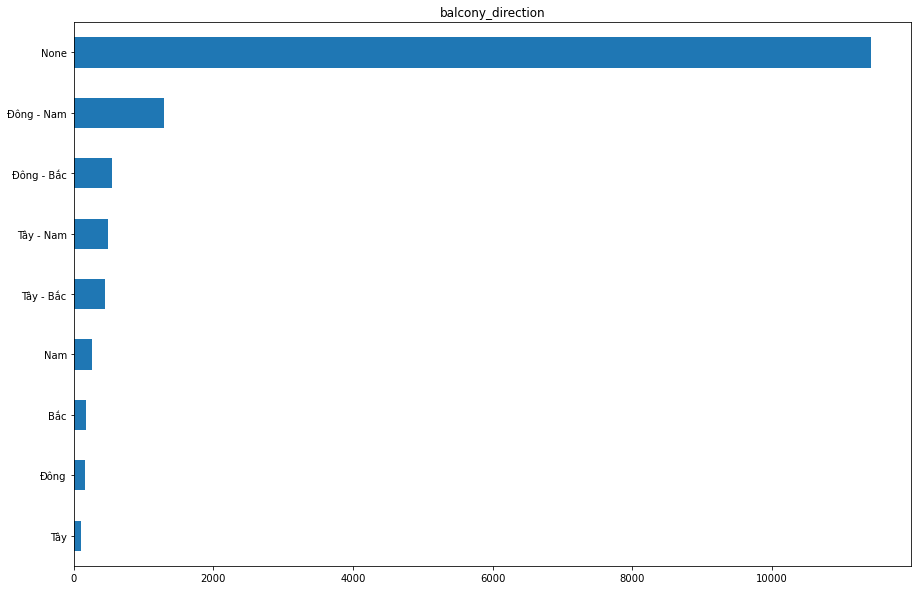

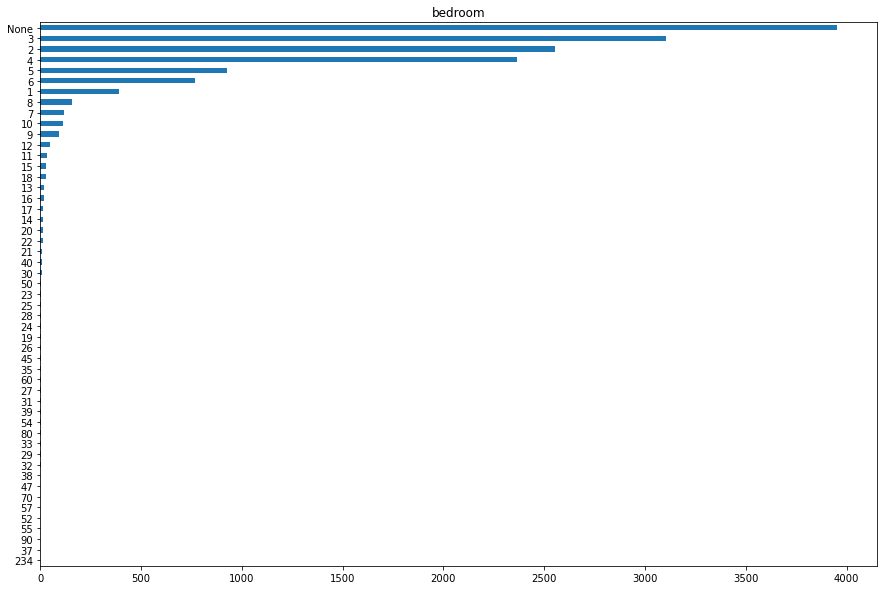

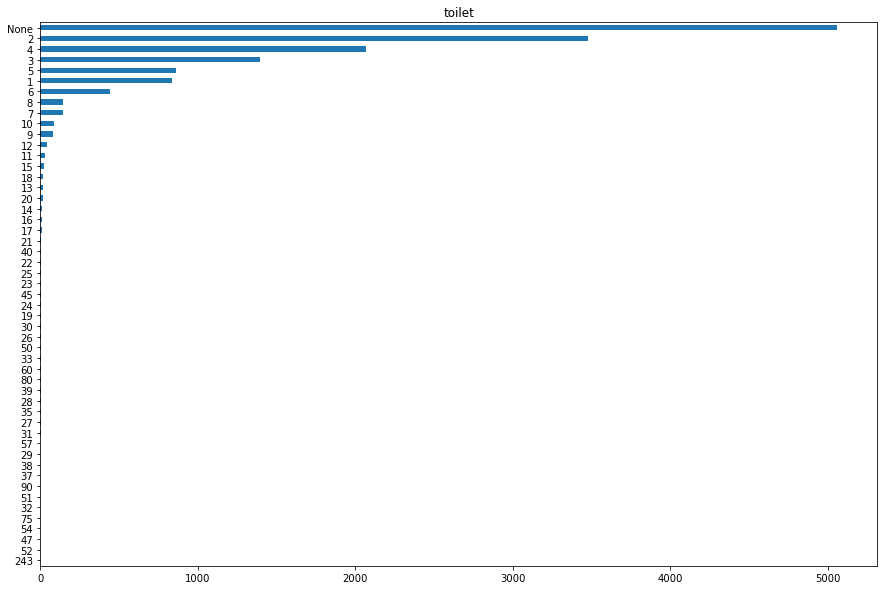

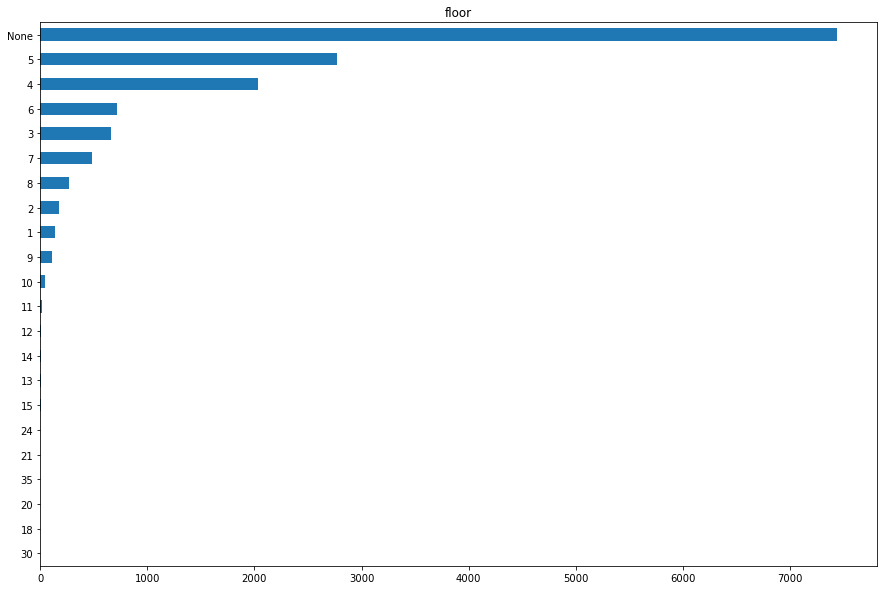

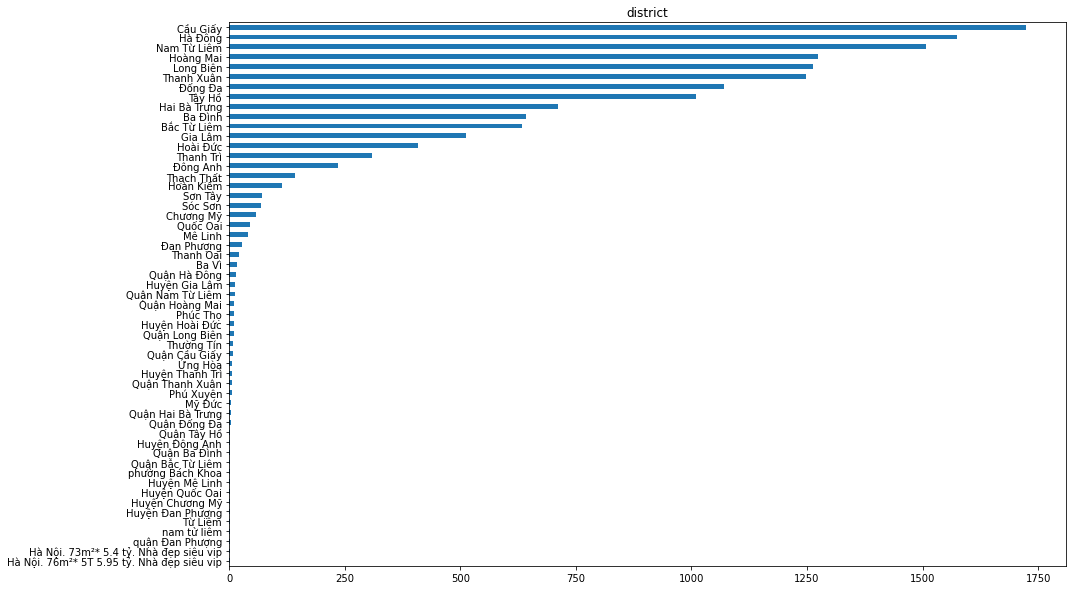

In [71]:
features = ['house_direction', 'balcony_direction', 'bedroom', 'toilet', 'floor','district']

for feature in features:
    data[feature].value_counts().sort_values(ascending=True).plot(kind="barh", figsize=(15,10), title=feature)
    plt.show()